In [1]:
try:
    import davos
except:
    %pip install davos
davos.config.suppress_stdout = True

In [2]:
from bs4 smuggle BeautifulSoup     # pip: beautifulsoup4==4.12.2
smuggle requests                   # pip: requests==2.28.2
from tqdm smuggle tqdm             # pip: tqdm==4.65.0
smuggle textract                   # pip: textract==1.6.4
smuggle Levenshtein                # pip: levenshtein
smuggle fuzzywuzzy                 # pip: fuzzywuzzy==0.18.0
smuggle unidecode                  # pip: Unidecode==1.3.6
smuggle pandas as pd               # pip: pandas==2.0.1
smuggle numpy as np                # pip: numpy==1.25.2
smuggle seaborn as sns             # pip: seaborn==0.12.2
from matplotlib smuggle pyplot as plt  # pip: matplotlib==3.7.1
from IPython.display import Markdown
smuggle openai                     # pip: openai==0.27.9

smuggle re
smuggle os
smuggle urllib
smuggle json
smuggle string
smuggle warnings
smuggle pickle
from glob smuggle glob as lsdir

from pathlib smuggle Path

from helpers smuggle format_filename, get_soup, get_pdf_text, get_doc_text, get_dialogue

In [3]:
import accelerate
import einops
import bitsandbytes
import sentencepiece
import llama_cpp
from huggingface_hub import hf_hub_download
from langchain.llms import LlamaCpp

/Users/jmanning/opt/anaconda3/envs/prediction-retrodiction/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


In [4]:
# model = 'TheBloke/Llama-2-70B-Orca-200k-GGML'
# weights = 'llama-2-70b-orca-200k.ggmlv3.Q5_0.bin'

# model_path = hf_hub_download(repo_id=model, filename=weights)

In [5]:
from llama_cpp import Llama

In [11]:
model_path = str(Path.cwd().parent.joinpath('data', 'llama-2-70b-orca-200k.gguf'))

In [ ]:
llm = Llama(model_path=model_path, n_gqa=8, verbose=False)

In [12]:
llama_cpp.init(model_path)

AttributeError: module 'llama_cpp' has no attribute 'init'

In [10]:
llm = LlamaCpp(model_path=model_path, max_tokens=256, n_batch=512)

Exception ignored in: <function Llama.__del__ at 0x2a1ed17e0>
Traceback (most recent call last):
  File "/Users/jmanning/opt/anaconda3/envs/prediction-retrodiction/lib/python3.10/site-packages/llama_cpp/llama.py", line 1435, in __del__
    if self.ctx is not None:
AttributeError: 'Llama' object has no attribute 'ctx'


ValidationError: 1 validation error for LlamaCpp
__root__
  Could not load Llama model from path: /Users/jmanning/.cache/huggingface/hub/models--TheBloke--Llama-2-70B-Orca-200k-GGML/snapshots/4c53c4642c29ab72a2cb8c4f2478b3f6406d7846/llama-2-70b-orca-200k.ggmlv3.Q5_0.bin. Received error Llama.__init__() got an unexpected keyword argument 'rope_freq_scale' (type=value_error)

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

with open(Path.cwd().parent.joinpath('data', 'prompt.txt'), 'r') as f:
    prompt = f.read()

prompt = PromptTemplate(prompt, input_variables=['text'])

chain = LLMChain(llm=llm, prompt=prompt)

In [6]:
from transformers import AutoTokenizer, AutoModelForCausalLM

hf_api_key_fname = Path.cwd().parent.joinpath('data', 'hf_api_key.txt')
with open(hf_api_key_fname) as f:
    hf_api_key = f.read().strip()

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-13b-chat-hf", token=hf_api_key)
#model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-70b-chat-hf", token=hf_api_key)


In [7]:
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-13b-chat-hf", token=hf_api_key)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

/Users/jmanning/opt/anaconda3/envs/prediction-retrodiction/lib/python3.10/site-packages/transformers/utils/hub.py:373: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [9]:
prompt = 'How much wood could a wood chuck chuck if a wood chuck could chuck wood?'
inputs = tokenizer(prompt, return_tensors="pt")

In [10]:
generate_ids = model.generate(inputs.input_ids, max_length=100, num_beams=5, early_stopping=True)

In [11]:
x = tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)

In [3]:
from langchain.llms import HuggingFacePipeline
from langchain.prompts import PromptTemplate


In [6]:
hf_api_key_fname = Path.cwd().parent.joinpath('data', 'hf_api_key.txt')
with open(hf_api_key_fname) as f:
    hf_api_key = f.read().strip()

llm = HuggingFacePipeline.from_model_id(
    model_id='meta-llama/Llama-2-70b-chat-hf',
    task='text-generation',
    model_kwargs={'max_length': 64, 'token': hf_api_key}
)

: 

: 

In [25]:
prompt_file = Path.cwd().parent.joinpath('data', 'prompt.txt')
api_key_file = Path.cwd().parent.joinpath('data', 'api_key.txt')
model = "gpt-3.5-turbo-16k"
chunk_size = 5000

def generate_gpt_responses_by_chunk(data_folder, prompt_file, api_key_file, model="gpt-3.5-turbo",
                                    chunk_size=20, max_files=None, max_attempts=3):
    # Read API key
    with open(api_key_file, 'r') as f:
        openai.api_key = f.read().strip()
        
    # Read prompt template
    with open(prompt_file, 'r') as f:
        prompt_template = f.read()
    
    # Initialize variables
    all_responses = pd.DataFrame()
    all_errors = []

    # Calculate total number of chunks for tqdm
    total_chunks = 0
    for file in os.listdir(data_folder)[:max_files]:
        if file.endswith('.txt'):
            with open(os.path.join(data_folder, file), 'r') as f:
                text = f.read()
            
            sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
            sentences = [' '.join(s.strip().split()) for s in sentences if len(s.strip()) > 0]
            total_chunks += -(-len(sentences) // chunk_size)

    # Initialize tqdm
    pbar = tqdm(total=total_chunks)
    
    # Start generating responses
    for file in os.listdir(data_folder)[:max_files]:
        if not file.endswith('.txt'):
            continue

        pkl_filename = f"{file[:-4]}_chunk{chunk_size}.pkl"
        pkl_filepath = os.path.join(data_folder, pkl_filename)

        if os.path.exists(pkl_filepath):
            # Load existing data
            with open(pkl_filepath, 'rb') as f:
                responses_df, file_errors = pickle.load(f)
        else:
            # Read and chunk file
            with open(os.path.join(data_folder, file), 'r') as f:
                text = f.read()
            
            sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
            sentences = [' '.join(s.strip().split()) for s in sentences if len(s.strip()) > 0]
            
            chunks = [sentences[i:i + chunk_size] for i in range(0, len(sentences), chunk_size)]
            responses_df = pd.DataFrame(columns=['file', 'chunk_idx', 'response'])
            file_errors = []
            
            # Generate GPT responses for each chunk
            for i, chunk in enumerate(chunks):
                prompt = prompt_template.replace("{text}", ' '.join(chunk))

                attempts = 0
                while attempts < max_attempts:
                    attempts += 1

                    response = openai.ChatCompletion.create(model=model, messages=[{"role": "system", "content": "You are a helpful assistant and an expert linguist. You are extremely good at following instructions."},
                                                                                   {"role": "user", "content": prompt}])['choices'][0]['message']['content']
                    
                    # Correct common mistakes
                    last_response = re.findall(r'P\d+F\d+', response.split()[-1])
                    if last_response:
                        break
                    elif re.search(r'F\d+$', response):
                        response = "P0" + re.findall(r'F\d+$', response)[-1]
                        break
                    elif re.search(r'P\d+$', response):
                        response = re.findall(r'P\d+$', response)[-1] + "F0"
                        break
                    # Log the error if max_attempts reached
                    if attempts >= max_attempts:
                        file_errors.append((i, response))
                    
                responses_df = responses_df._append(pd.DataFrame({'file': [file], 'chunk_idx': [i], 'response': [response]}), ignore_index=True)
                pbar.update(1)

            # Save chunk responses to a pickle file
            with open(pkl_filepath, 'wb') as f:
                pickle.dump((responses_df, file_errors), f)
        
        # Append responses and errors
        all_responses = all_responses._append(responses_df, ignore_index=True)
        all_errors.extend([(file, *error_tuple) for error_tuple in file_errors])
        
    pbar.close()
    return all_responses, all_errors

In [26]:
def parse_and_summarize_gpt_responses(all_responses):
    results_df = pd.DataFrame(columns=["filename", "past_count", "future_count"])

    for responses_df in all_responses:
        filename = responses_df.iloc[0]['filename']
        total_past = 0
        total_future = 0
        for index, row in responses_df.iterrows():
            output = row['response']
            try:
                parts = output.split('F')
                past_count = int(parts[0][1:])
                future_count = int(parts[1])
                total_past += past_count
                total_future += future_count
            except ValueError:
                pass  # Ignore incorrectly formatted responses
        
        new_row = {"filename": filename, "past_count": total_past, "future_count": total_future}
        results_df = results_df._append(new_row, ignore_index=True)

    return results_df

Compare manually vs. automatically tagged references from *The Chair*

In [27]:
# fill in proportions for manual reference counts
ref_fname = str(Path.cwd().parent.joinpath('data', 'the_chair', 'the_chair_manual_reference_counts.csv'))
manual = pd.read_csv(ref_fname)
manual['Total'] = manual['Past'] + manual['Future']

# # compute proportions
# manual['p(Past)'] = manual['Past'] / manual['Total']
# manual['p(Future)'] = manual['Future'] / manual['Total']

manual.reset_index(inplace=True)
manual['Episode'] = manual['index'] + 1
manual.drop(['index', 'Total'], axis=1, inplace=True)

manual = manual.melt(var_name='tense', value_name='count', id_vars=['Episode'])
manual.sort_values(['Episode'], inplace=True)
manual.reset_index(inplace=True, drop=True)
manual

,Episode,tense,count
0,1,Past,60
1,1,Future,18
2,2,Past,30
3,2,Future,14
4,3,Past,43
5,3,Future,33
6,4,Past,31
7,4,Future,21
8,5,Past,36
9,5,Future,11


In [28]:
chair_dir = Path.cwd().parent.joinpath('data', 'the_chair')

chair_results_fname = chair_dir.joinpath(f'the_chair_gpt_responses_c{chunk_size}.pkl')

if chair_results_fname.exists():
    with open(chair_results_fname, 'rb') as f:
        auto, errors = pickle.load(f)
else:
    auto, errors = generate_gpt_responses_by_chunk(chair_dir, prompt_file=prompt_file, api_key_file=api_key_file, chunk_size=chunk_size, max_files=1, model=model)
    with open(chair_results_fname, 'wb') as f:
        pickle.dump((auto, errors), f)

auto = parse_and_summarize_gpt_responses(auto)
auto

User: I'd like your help, as a linguist and an expert on literature. Please read the following text, between the <text>...</text> tags, and carefully identify any sentences or phrases that refer to to past or future events.

Your job is to follow the four steps below and then respond in JSON format, following the template below delimited by the <json_template>...</json_template> tags:

1. Try to understand what is happening in the story excerpt depicted by the text.
2. Split the text given below into individual sentences, denoted S0, S1, S2, ..., SN (assuming there are N sentences).  Keep track of each sentence's text and store it in the "content" field for that sentence (replacing the "..." in the template with the actual content of the sentence).
3. For each sentence, count up the number of references to past (P) events and future (F) events, and store the counts in the "P" and "F" fields, respectively (replacing the "..." in the template with the actual counts).
4. Continue steps 2 

InvalidRequestError: This model's maximum context length is 4097 tokens. However, your messages resulted in 5115 tokens. Please reduce the length of the messages.

In [47]:
auto

,filename,chunk,response
0,the_chair_s1e5_transcript.txt,[Larson] Did you at any point threaten Bill’s ...,P4F0
1,the_chair_s1e5_transcript.txt,We would like you to make some kind of statem...,P1F4
2,the_chair_s1e5_transcript.txt,Videos. That was… Getting rides from female...,P4F0
3,the_chair_s1e5_transcript.txt,"No, no, she shouldn’t have to. His wife died...",P4F0
4,the_chair_s1e5_transcript.txt,You’ve managed to do the opposite. Sign here...,P7F2
5,the_chair_s1e5_transcript.txt,[Ji-Yoon] Nobody. I just have to give this to...,P6F0
6,the_chair_s1e5_transcript.txt,"She won’t be able to find him. Yes, she will...",P1F1
7,the_chair_s1e5_transcript.txt,"[breathes deeply] Baby, for God’s sakes, jus...",P4F1
8,the_chair_s1e5_transcript.txt,[Habi] Mexico? [in Korean] For homework. [i...,P1F0
9,the_chair_s1e5_transcript.txt,[water splashing] What the fuck? Hey. Hi....,P1F0


In [45]:
errors

[{'filename': 'the_chair_s1e5_transcript.txt',
  'chunk': ' Here’s her stuff. I’ll be back later.  [in Korean] When are you coming back?  I’m not sure.  Minji only has a first birthday once.  Everyone complains how they never see you.  [in English] Appa, I don’t know what you want me to do. This is for my job.  [in Korean] I thought this promotion means you don’t have to work so much.  [in English] What promotion ever means you don’t have to work as much?',
  'error': 'Invalid output format'},
 {'filename': 'the_chair_s1e5_transcript.txt',
  'chunk': ' Well, she wanted me to doctor my tenure letter for Yaz  in exchange for co-teacher.  I get put on a list.  What about Bob? I mean, what about Bill? What about Bill?  [chuckling] I can’t take you seriously  when you look like you just stuck your head in a beehive. Here.  Bill’s not on this list.  No, Bill, everybody knows she’s in love with him.  Now, if one of us had stepped out of line,  she would not be going to the mat like this.',
  

# Infer tense from text using NLTK's taggers

Single sentence tagging

In [ ]:
data_dir = str(Path.cwd().parent.joinpath('data'))
tagger = os.path.join(data_dir, 'english-bidirectional-distsim.tagger')
jar = os.path.join(data_dir, 'stanford-postagger.jar')

stanford_tagger = StanfordPOSTagger(tagger, jar, encoding='utf8')

def sentence_tense(x):
  # source: https://stackoverflow.com/questions/30016904/determining-tense-of-a-sentence-python
  def tense_detect(tagged_sentence):        
    verb_tags = ['MD','MDF',
                'BE','BEG','BEN','BED','BEDZ','BEZ','BEM','BER',
                'DO','DOD','DOZ',
                'HV','HVG','HVN','HVD','HVZ',
                'VB','VBG','VBN','VBD','VBZ',
                'SH',
                'TO',                
                'JJ']
    
    verb_phrase = []
    for item in tagged_sentence:
        if item[1] in verb_tags:
            verb_phrase.append(item)

    grammar = r'''
            future perfect continuous passive:     {<MDF><HV><BEN><BEG><VBN|VBD>+}
            conditional perfect continuous passive:{<MD><HV><BEN><BEG><VBN|VBD>+}
            future continuous passive:             {<MDF><BE><BEG><VBN|VBD>+}   
            conditional continuous passive:        {<MD><BE><BEG><VBN|VBD>+}    
            future perfect continuous:             {<MDF><HV><BEN><VBG|HVG|BEG>+}   
            conditional perfect continuous:        {<MD><HV><BEN><VBG|HVG|BEG>+}
            past perfect continuous passive:       {<HVD><BEN><BEG><VBN|VBD>+}
            present perfect continuous passive:    {<HV|HVZ><BEN><BEG><VBN|VBD>+}
            future perfect passive:                {<MDF><HV><BEN><VBN|VBD>+}   
            conditional perfect passive:           {<MD><HV><BEN><VBN|VBD>+}    
            future continuous:                     {<MDF><BE><VBG|HVG|BEG>+ }   
            conditional continuous:                {<MD><BE><VBG|HVG|BEG>+  }   
            future indefinite passive:             {<MDF><BE><VBN|VBD>+ }
            conditional indefinite passive:        {<MD><BE><VBN|VBD>+  }
            future perfect:                        {<MDF><HV><HVN|BEN|VBN|VBD>+ }   
            conditional perfect:                   {<MD><HV><HVN|BEN|VBN|VBD>+  }   
            past continuous passive:               {<BED|BEDZ><BEG><VBN|VBD>+}  
            past perfect continuous:               {<HVD><BEN><HVG|BEG|VBG>+}   
            past perfect passive:                  {<HVD><BEN><VBN|VBD>+}
            present continuous passive:            {<BEM|BER|BEZ><BEG><VBN|VBD>+}   
            present perfect continuous:            {<HV|HVZ><BEN><VBG|BEG|HVG>+}    
            present perfect passive:               {<HV|HVZ><BEN><VBN|VBD>+}
            future indefinite:                     {<MDF><BE|DO|VB|HV>+ }       
            conditional indefinite:                {<MD><BE|DO|VB|HV>+  }   
            past continuous:                       {<BED|BEDZ><VBG|HVG|BEG>+}           
            past perfect:                          {<HVD><BEN|VBN|HVD|HVN>+}
            past indefinite passive:               {<BED|BEDZ><VBN|VBD>+}   
            present indefinite passive:            {<BEM|BER|BEZ><VBN|VBD>+}            
            present continuous:                    {<BEM|BER|BEZ><BEG|VBG|HVG>+}            
            present perfect:                       {<HV|HVZ><BEN|HVD|VBN|VBD>+  }       
            past indefinite:                       {<DOD><VB|HV|DO>|<BEDZ|BED|HVD|VBN|VBD>+}        
            infinitive:                            {<TO><BE|HV|VB>+}
            present indefinite:                    {<DO|DOZ><DO|HV|VB>+|<DO|HV|VB|BEZ|DOZ|BER|HVZ|BEM|VBZ>+}    
            '''

    if len(verb_phrase) > 0:
      cp = nltk.RegexpParser(grammar)
      result = cp.parse(verb_phrase)
    else:
      result = []
    
    tenses_set = set()
    for node in result:
      if type(node) is nltk.tree.Tree:
        tenses_set.add(node.label())
    
    return tenses_set
    
  text = word_tokenize(x)
  tagged = stanford_tagger.tag(x)
  return tense_detect(tagged)

Document-level tagging

In [ ]:
def tag_document(x):
  counts = {}
  for s in tokenize.sent_tokenize(x):
    if len(s) > 0:
      for t in sentence_tense(s):
        counts[t] = counts.get(t, 0) + 1
    else:
      pass
  return counts

# Download datasets

## [Internet Movie Script Database (IMSDb)](https://imsdb.com/)

In [ ]:
imsdb_dir = str(Path.cwd().parent.joinpath('data').joinpath('imsdb'))
if not os.path.exists(imsdb_dir):
  os.makedirs(imsdb_dir)

In [ ]:
def get_imsdb():
    ALL_URL = "https://imsdb.com/all-scripts.html"
    BASE_URL = "https://imsdb.com"
    SOURCE = "imsdb"

    def get_script_from_url(script_url):
        text = ""

        try:
            if script_url.endswith('.pdf'):
                text = get_pdf_text(script_url, os.path.join(SOURCE, file_name))
                return text

            if script_url.endswith('.html'):
                script_soup = get_soup(
                    script_url)
                if script_soup == None:
                    return text
                if len(script_soup.find_all('td', class_="scrtext")) < 1:
                    return ""
                script_text = script_soup.find_all(
                    'td', class_="scrtext")[0].pre

                if script_text:
                    script_text = script_soup.find_all(
                        'td', class_="scrtext")[0].pre.pre
                    if script_text:
                        text = script_text.get_text()

                    else:
                        script_text = script_soup.find_all(
                            'td', class_="scrtext")[0].pre
                        text = script_text.get_text()
        except Exception as err:
            # print(script_url)
            # print(err)
            text = ""

        return text

    def get_script_url(movie):
        script_page_url = movie.contents[0].get('href')
        name = movie.contents[0].text
        movie_name = script_page_url.split("/")[-1].strip('Script.html')

        script_page_soup = get_soup(BASE_URL + urllib.parse.quote(script_page_url))
        if script_page_soup == None:
            return "", name
        paras = script_page_soup.find_all('p', align="center")
        if len(paras) < 1:
            return "", ""
        script_url = paras[0].contents[0].get('href')

        return script_url, name

    soup = get_soup(ALL_URL)
    movielist = soup.find_all('p')

    for movie in tqdm(movielist, desc=SOURCE):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            script_url, name = get_script_url(movie)
    
        if script_url == "":
            continue
        
        script_url = BASE_URL + urllib.parse.quote(script_url)
        file_name = format_filename(name)

        if os.path.exists(os.path.join(imsdb_dir, file_name + '.txt')):
            continue
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            text = get_script_from_url(script_url)

        if text == "" or name == "":
            continue
        
        with open(os.path.join(imsdb_dir, file_name + '.txt'), 'w', errors="ignore") as out:
            out.write(text)

In [ ]:
if os.path.exists(imsdb_dir):
    fnames = [f for f in os.listdir(imsdb_dir) if f.endswith('.txt')]
else:
    fnames = []

if len(fnames) < 1000:
    get_imsdb()
    fnames = [f for f in os.listdir(imsdb_dir) if f.endswith('.txt')]

print(f'Found {len(fnames)} IMSDB scripts.')

Found 1127 IMSDB scripts.


In [ ]:
def count_tokens_in_directory(directory_path):
    filenames = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.txt')]
    total_tokens = 0
    
    for filename in filenames:
        with open(filename, 'r', encoding='utf-8') as file:
            text = file.read()
            tokens = len(text.split())  # A rough approximation
            total_tokens += tokens
    
    return total_tokens

# You need to set the cost per token for each model according to your specific OpenAI plan
cost_per_token_gpt3_5 = 0.000004
cost_per_token_gpt4 = 0.00012

total_tokens = count_tokens_in_directory(imsdb_dir)

total_cost_gpt3_5 = total_tokens * cost_per_token_gpt3_5
total_cost_gpt4 = total_tokens * cost_per_token_gpt4

print(f"Total tokens in the directory: {total_tokens}")
print(f"Estimated cost with GPT-3.5-turbo: ${total_cost_gpt3_5}")
print(f"Estimated cost with GPT-4: ${total_cost_gpt4}")

Total tokens in the directory: 26023895
Estimated cost with GPT-3.5-turbo: $104.09558
Estimated cost with GPT-4: $3122.8674


In [ ]:
smuggle stanza

In [ ]:
stanza.__version__

'1.5.0'

Display a randomly chosen excerpt from a randomly chosen transcript

In [ ]:
sample = np.random.choice(fnames)

with open(os.path.join(imsdb_dir, sample), 'r') as f:
    lines = f.readlines()
    lines = [x.strip() for x in lines if len(x.strip()) > 0]

    # choose a 10 line snippet at random
    start = np.random.randint(0, len(lines) - 10)
    snippet = lines[start:start+10]

Markdown(f'**Excerpt from {sample}:**\n\n' + '\n\n'.join(snippet))

**Excerpt from Lock-Stock-and-Two-Smoking-Barrels.txt:**

Harry, that boy doesn't know his arsehole from his ear-hole, or you

from a hoodwink. This bar is mine, and he has nothing to do with it.

HATCHET

What, and I care? Remember, you do have the luxurious advantage of

being able to sustain your son's life.

JD

And you do have a reputation, so I'll choose my words carefully. But

not to put too fine a point on it, fuck yourself, Harry!

Barry pulls a kind of mock-scared face and clutches his heart.

80

In [ ]:
# chatGPT's solution (after some tweaking)!

def count_tenses_in_files(filepaths):
    df = pd.DataFrame(columns=['filename', 'past_tense', 'future_tense'])

    for filepath in filepaths:
        with open(filepath, 'r', encoding='utf-8') as f:
            text = f.read()

        sentences = sent_tokenize(text)

        past_count = 0
        future_count = 0

        for sentence in sentences:
            # Expand contractions for better matching
            sentence = re.sub(r"won't", "will not", sentence)
            sentence = re.sub(r"can't", "cannot", sentence)
            sentence = re.sub(r"i'm", "i am", sentence)
            sentence = re.sub(r"ain't", "is not", sentence)
            sentence = re.sub(r"(\w+)'ll", "\\1 will", sentence)
            sentence = re.sub(r"(\w+)n't", "\\1 not", sentence)
            sentence = re.sub(r"(\w+)'ve", "\\1 have", sentence)
            sentence = re.sub(r"(\w+)'s", "\\1 is", sentence)
            sentence = re.sub(r"(\w+)'re", "\\1 are", sentence)

            # Check for future tense patterns
            if re.search(r'\bwill\b|\bshall\b|\bam going to\b|\bwill have\b|\bshall have\b|\bwill be\b|\bshall be\b|\b(is|are) going to\b|\b(is|are|am) about to\b|\b(is|are|am) planning to\b|\b(is|are|am) looking forward to\b', sentence, re.IGNORECASE):
                future_count += 1

            # Check for past tense patterns
            if re.search(r'\bwas\b|\bwere\b|\bhad\b|\bdid\b|\bhad been\b|\bwas going to\b|\bwere going to\b|\bwas supposed to\b|\bwere supposed to\b|\bwould have\b|\bshould have\b|\bcould have\b|\bmight have\b|\bwas planning to\b|\bwere planning to\b|\bwas looking forward to\b|\bwere looking forward to\b', sentence, re.IGNORECASE):
                past_count += 1

        df = df.append({'filename': filepath, 'past_tense': past_count, 'future_tense': future_count}, ignore_index=True)

    return df

In [ ]:
def add_dict(d1, d2):
  for k in d2:
    if k in d1:
      d1[k] += d2[k]
    else:
      d1[k] = d2[k]
  return d1

Test run: validate against The Chair (Season 1, Episodes 1--6)

In [ ]:
demo_fname = lambda n: str(Path.cwd().parent.joinpath('data').joinpath('the_chair_s1e' + str(n) + '_transcript.txt'))
ref_fname = str(Path.cwd().parent.joinpath('data').joinpath('the_chair_manual_reference_counts.csv'))

def get_demo_tenses(fname):
    text = open(fname, 'r').read()
    tenses = pd.DataFrame.from_dict(tag_document(text), orient='index', columns=['count']).reset_index().rename(columns={'index': 'tense'})

    mapping = {'present indefinite': 'Present',
            'past indefinite': 'Past',
            'conditional indefinite': 'Future',
            'infinitive': 'Present'}

    tenses['index'] = tenses['tense'].apply(lambda x: mapping[x] if x in mapping else x)
    
    # drop present tense
    tenses = tenses.groupby('index').sum().reset_index().sort_values('count', ascending=False).set_index('index').loc[['Past', 'Future']]
    tenses['proportion'] = tenses['count'] / tenses['count'].sum()

    return tenses.drop('tense', axis=1).reset_index().rename(columns={'index': 'tense'})

In [ ]:
# fill in proportions for manual reference counts
manual = pd.read_csv(ref_fname)
manual['Total'] = manual['Past'] + manual['Future']

# convert to proportions
manual['Past'] = manual['Past'] / manual['Total']
manual['Future'] = manual['Future'] / manual['Total']

manual.reset_index(inplace=True)
manual['Episode'] = manual['index'] + 1
manual.drop(['index', 'Total'], axis=1, inplace=True)

manual = manual.melt(var_name='tense', value_name='proportion', id_vars=['Episode'])
manual.sort_values(['Episode'], inplace=True)
manual


,Episode,tense,proportion
0,1,Past,0.769231
6,1,Future,0.230769
1,2,Past,0.681818
7,2,Future,0.318182
2,3,Past,0.565789
8,3,Future,0.434211
3,4,Past,0.596154
9,4,Future,0.403846
4,5,Past,0.765957
10,5,Future,0.234043


In [ ]:
episodes = np.arange(1, 7, dtype=int)
tenses = [get_demo_tenses(demo_fname(n)) for n in episodes]

# add episode labels
for i, t in enumerate(tenses):
    t['episode'] = episodes[i]

# combine into one dataframe
tenses = pd.concat(tenses, ignore_index=True)

sns.barplot(tenses, x='tense', y='proportion', hue='episode', palette='viridis')
plt.xlabel('Tense', fontsize=14)
plt.ylabel('Proportion of references', fontsize=14)
plt.legend(title='Episode', loc='upper right')
sns.despine(top=True, right=True)

ax = plt.gca()

# add manual reference counts as dotted lines
for i, p in enumerate(ax.patches):
    x = [p.get_x(), p.get_x() + p.get_width()]  # X-coordinate of the center of the bar
    y = manual.iloc[i]['proportion']
    ax.plot(x, [y, y], linestyle='dotted', linewidth=2, color='black')

OSError: Java command failed : ['/Users/jmanning/opt/anaconda3/envs/prediction-retrodiction/bin/java', '-mx1000m', '-cp', '/Users/jmanning/prediction-retrodiction-paper/data/stanford-postagger.jar', 'edu.stanford.nlp.tagger.maxent.MaxentTagger', '-model', '/Users/jmanning/prediction-retrodiction-paper/data/english-bidirectional-distsim.tagger', '-textFile', '/var/folders/tp/qtzc39jx5w556wl5w3dj21wr0000gn/T/tmppp4qbrsh', '-tokenize', 'false', '-outputFormatOptions', 'keepEmptySentences', '-encoding', 'utf8']

In [ ]:
os.system('which java')

/Users/jmanning/opt/anaconda3/envs/prediction-retrodiction/bin/java


0

In [ ]:
stanford_tagger.tag('This is a test'.split())

OSError: Java command failed : ['/Users/jmanning/opt/anaconda3/envs/prediction-retrodiction/bin/java', '-mx1000m', '-cp', '/Users/jmanning/prediction-retrodiction-paper/data/stanford-postagger.jar', 'edu.stanford.nlp.tagger.maxent.MaxentTagger', '-model', '/Users/jmanning/prediction-retrodiction-paper/data/english-bidirectional-distsim.tagger', '-textFile', '/var/folders/tp/qtzc39jx5w556wl5w3dj21wr0000gn/T/tmpnv4bm30d', '-tokenize', 'false', '-outputFormatOptions', 'keepEmptySentences', '-encoding', 'utf8']

In [ ]:
all_tenses = []
for f in tqdm(fnames):
  tenses = {}
  dialogue = get_dialogue(os.path.join(imsdb_dir, f))

  if dialogue is None:
    continue

  for d in dialogue['Character_dialogue'].values:
    d = d.strip()
    if len(d) > 0:
      tenses = add_dict(tenses, tag_document(d))
  
  all_tenses.append((f[:-4], tenses))

100%|██████████| 1127/1127 [5:02:25<00:00, 16.10s/it]   


In [ ]:
def tenses2df(all_tenses):
    keys = set()
    for t in all_tenses:
        keys = keys.union(set(t[1].keys()))

    df = pd.DataFrame(columns=list(keys), index=pd.Index([t[0] for t in all_tenses], name='Film'))
    for m, t in all_tenses:
        for k in t:
            df.loc[m, k] = t[k]

    df = df.fillna(0)
    df['Total'] = df.sum(axis=1)

    for k in keys:
        df[k] = df[k] / df['Total']
    df.drop('Total', axis=1, inplace=True)
    return df.dropna(how='all', axis=0)

In [ ]:
df = tenses2df(all_tenses)
df

,conditional indefinite,present indefinite,past indefinite,infinitive
Film,,,,
Midnight-Express,0.061722,0.542012,0.272303,0.123963
Big-Eyes,0.076048,0.555096,0.284532,0.084325
Warrior,0.069118,0.520588,0.272794,0.137500
Hellraiser-Hellseeker,0.088144,0.512725,0.278088,0.121043
Hannah-and-Her-Sisters,0.087430,0.511512,0.270068,0.130989
...,...,...,...,...
Smashed,0.125676,0.448649,0.283108,0.142568
Wild-Wild-West,0.093483,0.529380,0.240385,0.136752
Sessions-The,0.115983,0.505658,0.239745,0.138614


<Axes: xlabel='Proportion', ylabel='Tense'>

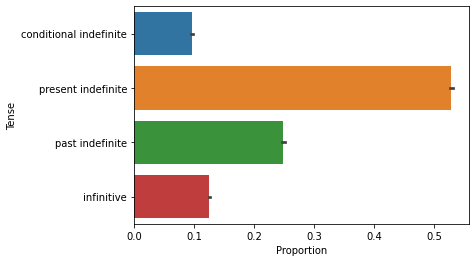

In [ ]:
sns.barplot(data=df.reset_index().melt(id_vars='Film', var_name='Tense', value_name='Proportion'), y='Tense', x='Proportion', orient='h')